In [1]:
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
import os

load_dotenv()
def set_env_vars(var):
    os.environ[var] = os.getenv(var)


vars = ["OPENAI_API_KEY", "LANGCHAIN_API_KEY", "LANGCHAIN_TRACING_V2", "LANGCHAIN_ENDPOINT", "LANGCHAIN_PROJECT", "TAVILY_API_KEY"]

for var in vars:
    set_env_vars(var)

llm = ChatOpenAI(model="gpt-4o-mini")


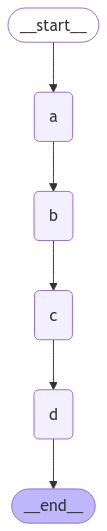

In [2]:
from IPython.display import Image, display
from typing import TypedDict, Any, TypedDict

from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    state: str

class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['state']}")
        return {"state" : [self._value]}

builder = StateGraph(State)

builder.add_node("a", ReturnNodeValue("I am A"))
builder.add_node("b", ReturnNodeValue("I am B"))
builder.add_node("c", ReturnNodeValue("I am C"))
builder.add_node("d", ReturnNodeValue("I am D"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", "c")
builder.add_edge("c", "d")
builder.add_edge("d", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))



In [3]:
graph.invoke({"state": []})

Adding I am A to []
Adding I am B to ['I am A']
Adding I am C to ['I am B']
Adding I am D to ['I am C']


{'state': ['I am D']}

In [4]:
builder = StateGraph(State)

builder.add_node("a", ReturnNodeValue("I am A"))
builder.add_node("b", ReturnNodeValue("I am B"))
builder.add_node("c", ReturnNodeValue("I am C"))
builder.add_node("d", ReturnNodeValue("I am D"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)

graph = builder.compile()

In [5]:
from langgraph.errors import InvalidUpdateError

try:
    graph.invoke({"state": []})
except InvalidUpdateError as e:
    print(e)



Adding I am A to []
Adding I am B to ['I am A']
Adding I am C to ['I am A']
At key 'state': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


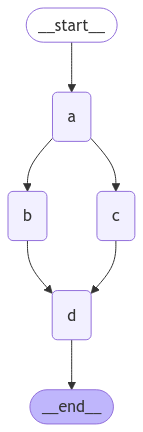

In [6]:
from operator import add
from typing import Annotated

class State(TypedDict):
    state: Annotated[list[int], add]


class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['state']}")
        return {"state" : [self._value]}

builder = StateGraph(State)

builder.add_node("a", ReturnNodeValue("I am A"))
builder.add_node("b", ReturnNodeValue("I am B"))
builder.add_node("c", ReturnNodeValue("I am C"))
builder.add_node("d", ReturnNodeValue("I am D"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
graph.invoke({"state": []})

Adding I am A to []
Adding I am B to ['I am A']
Adding I am C to ['I am A']
Adding I am D to ['I am A', 'I am B', 'I am C']


{'state': ['I am A', 'I am B', 'I am C', 'I am D']}

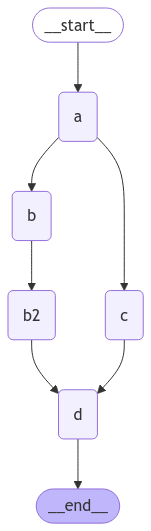

In [8]:
from operator import add
from typing import Annotated

class State(TypedDict):
    state: Annotated[list[int], add]


class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['state']}")
        return {"state" : [self._value]}

builder = StateGraph(State)

builder.add_node("a", ReturnNodeValue("I am A"))
builder.add_node("b", ReturnNodeValue("I am B"))
builder.add_node("b2", ReturnNodeValue("I am B2"))
builder.add_node("c", ReturnNodeValue("I am C"))
builder.add_node("d", ReturnNodeValue("I am D"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
graph.invoke({"state": []})

Adding I am A to []
Adding I am B to ['I am A']
Adding I am C to ['I am A']
Adding I am B2 to ['I am A', 'I am B', 'I am C']
Adding I am D to ['I am A', 'I am B', 'I am C', 'I am B2']


{'state': ['I am A', 'I am B', 'I am C', 'I am B2', 'I am D']}

In [10]:
from langchain_community.document_loaders import WikipediaLoader

def web_search(question):
    search_docs = WikipediaLoader(query=question, load_max_docs=3).load()
    formatted_search_docs = "\n\n---\n\n".join([f'<Document source="{doc.metadata['source']}" page ="{doc.metadata.get("page","")}"/>\n{doc.page_content}</Document>' for doc in search_docs])
    return formatted_search_docs

docs = web_search("New trends in AI")


    



In [11]:
print(docs)

<Document source="https://en.wikipedia.org/wiki/.ai" page =""/>
.ai is the Internet country code top-level domain (ccTLD) for Anguilla, a British Overseas Territory in the Caribbean. It is administered by the government of Anguilla.
It is popular with companies and projects related to the artificial intelligence industry (AI).
Google's ad targeting treats .ai as a generic top-level domain (gTLD) because "users and website owners frequently see [the domain] as being more generic than country-targeted."


== Second and third level registrations ==
Registrations within off.ai, com.ai, net.ai, and org.ai are available worldwide without restriction. From 15 September 2009, second level registrations within .ai are available to everyone worldwide.


== Registration ==
The minimum registration term allowed for a .ai domain is 2 years for registration and 2 years for renewal. The authority in charge of managing this extension is “WHOIS.AI”. Registrations began on 1995-02-16. The minimum length

In [12]:
from langchain_community.tools import TavilySearchResults
from langchain_community.document_loaders import WikipediaLoader
from langchain_core.messages import HumanMessage, SystemMessage


class State(TypedDict):
    question: str
    answer: str
    context: Annotated[list[str], add]

def web_search(state: State) -> State:

    """
    Retrieves docs from web search
    """

    print("------- Web Search -------")
    tavily_search = TavilySearchResults(max_results=3)
    search_docs = tavily_search.invoke(state["question"])
    formatted_search_docs = "\n\n---\n\n".join([f'<Document href="{doc['url']}"/>\n{doc['content']}</Document>' for doc in search_docs])
    print(f"{formatted_search_docs[:200]} .....")
    return {"context": [formatted_search_docs]}


def wikipedia_search(state: State) -> State:
    """
    Retrieves docs from wikipedia search
    """
    print("------- Wikipedia Search -------")
    search_docs = WikipediaLoader(query=state["question"], load_max_docs=2).load()
    formatted_search_docs = "\n\n---\n\n".join([f'<Document source="{doc.metadata['source']}"/>\n{doc.page_content}</Document>' for doc in search_docs])
    print(f"{formatted_search_docs[:200]} .....")
    return {"context": [formatted_search_docs]}


def generate_answer(state: State) -> State:
    """
    Node to answer the question
    """
    print("------- Generate Answer -------")
    context = state["context"]
    question = state["question"]

    system_message = "You are a helpful assistant that answers questions based on the provided context."
    human_message_template = "Answer the following question based on the context provided: {context} \n\n Question: {question}"
    human_message = human_message_template.format(context=context, question=question)

    

    answer = llm.invoke([SystemMessage(content=system_message)] + [HumanMessage(content=human_message)])
    return {"answer": answer}

builder = StateGraph(State)

builder.add_node("web_search", web_search)
builder.add_node("wikipedia_search", wikipedia_search)
builder.add_node("generate_answer", generate_answer)

builder.add_edge(START, "web_search")
builder.add_edge(START, "wikipedia_search")
builder.add_edge("web_search", "generate_answer")
builder.add_edge("wikipedia_search", "generate_answer")
builder.add_edge("generate_answer", END)

graph = builder.compile()



In [13]:
for event in graph.stream({"question": "How were Nvidia's Q2 2024 earnings"}, stream_mode= "values"):
    print(event)

{'question': "How were Nvidia's Q2 2024 earnings", 'context': []}
------- Web Search -------
------- Wikipedia Search -------
<Document href="https://nvidianews.nvidia.com/news/nvidia-announces-financial-results-for-second-quarter-fiscal-2025"/>
NVIDIA (NASDAQ: NVDA) today reported revenue for the second quarter ended July 2 .....
<Document source="https://en.wikipedia.org/wiki/Nvidia"/>
Nvidia Corporation ( en-VID-ee-ə) is an American multinational corporation and technology company headquartered in Santa Clara, California, an .....
{'question': "How were Nvidia's Q2 2024 earnings", 'context': ['<Document href="https://nvidianews.nvidia.com/news/nvidia-announces-financial-results-for-second-quarter-fiscal-2025"/>\nNVIDIA (NASDAQ: NVDA) today reported revenue for the second quarter ended July 28, 2024, of $30.0 billion, up 15% from the previous quarter and up 122% from a year ago. For the quarter, GAAP earnings per diluted share was $0.67, up 12% from the previous quarter and up 168% f

In [14]:
result = graph.invoke({"question": "How were Nvidia's Q2 2024 earnings"})


------- Web Search -------------- Wikipedia Search -------

<Document href="https://nvidianews.nvidia.com/news/nvidia-announces-financial-results-for-second-quarter-fiscal-2025"/>
NVIDIA (NASDAQ: NVDA) today reported revenue for the second quarter ended July 2 .....
<Document source="https://en.wikipedia.org/wiki/Nvidia"/>
Nvidia Corporation ( en-VID-ee-ə) is an American multinational corporation and technology company headquartered in Santa Clara, California, an .....
------- Generate Answer -------


In [15]:
from textwrap import wrap
print("\n\n".join(wrap(result['answer'].content, 100)))


Nvidia's Q2 2024 earnings report showed impressive results. The company reported revenue of $30.0

billion for the quarter, which represented a 15% increase from the previous quarter and a remarkable

122% increase compared to the same quarter a year ago.   In terms of earnings per share (EPS), the

GAAP earnings per diluted share were $0.67, up 12% from the previous quarter and up 168% year-over-

year. The non-GAAP earnings per diluted share were slightly higher at $0.68, which was an 11%

increase from the prior quarter and a 152% increase from the same quarter last year.   This strong

financial performance was driven by continued growth, particularly in Nvidia's Data Center segment,

which is becoming a significant contributor to the company's overall revenue.


## With Langgraph API

In [20]:
from langgraph_sdk import get_client

client = get_client(url = "http://localhost:49413")

thread = await client.threads.create()



/var/folders/3g/r3ht76p907vdqxh325xx85tm0000ks/T/ipykernel_16501/2069824477.py:5: RuntimeWarning: coroutine 'ThreadsClient.create' was never awaited
  thread = await client.threads.create()


In [24]:
input = {"question": "How were Nvidia's Q2 2024 earnings"}
thread = await client.threads.create()
async for event in client.runs.stream(
    thread["thread_id"],
    assistant_id = "parallelization",
    input = input,
    stream_mode="values"
):
    answer = event.data.get("answer", None)
    question = event.data.get("question", None)
    context = event.data.get("context", None)
    if answer:  
        print(f"Answer: {answer['content']}")
    if question:
        print(f"Question: {question}")
    if context:
        print(f"Context: {context}")
    print("-"*100)


----------------------------------------------------------------------------------------------------
Question: How were Nvidia's Q2 2024 earnings
----------------------------------------------------------------------------------------------------
Question: How were Nvidia's Q2 2024 earnings
Context: ['<Document href="https://nvidianews.nvidia.com/news/nvidia-announces-financial-results-for-second-quarter-fiscal-2025"/>\nNVIDIA (NASDAQ: NVDA) today reported revenue for the second quarter ended July 28, 2024, of $30.0 billion, up 15% from the previous quarter and up 122% from a year ago. For the quarter, GAAP earnings per diluted share was $0.67, up 12% from the previous quarter and up 168% from a year ago. Non-GAAP earnings per diluted share was $0.68, up 11% from the previous quarter and up 152% from a year ago. These non-GAAP measures include non-GAAP gross profit, non-GAAP gross margin, non-GAAP operating expenses, non-GAAP income from operations, non-GAAP other income (expense), net